In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv(r"/content/sample_data/california_housing_test.csv")

In [85]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [87]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [88]:
train_data = x_train.join(y_train)

In [89]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2423,-118.44,34.19,11.0,2891.0,951.0,2166.0,768.0,2.8910,178100.0
1967,-118.30,33.75,23.0,1957.0,517.0,1454.0,526.0,3.5056,203100.0
1378,-118.17,33.83,46.0,1362.0,214.0,531.0,222.0,4.3125,290500.0
1791,-117.99,34.08,11.0,2399.0,527.0,2307.0,531.0,3.5625,141000.0
195,-116.92,32.86,11.0,2204.0,518.0,1472.0,497.0,2.3693,127000.0
...,...,...,...,...,...,...,...,...,...
2426,-118.27,33.94,43.0,1309.0,344.0,1182.0,340.0,1.6625,88700.0
1621,-116.52,33.81,12.0,12396.0,2552.0,2548.0,1265.0,3.4394,162200.0
648,-119.40,36.59,37.0,1486.0,296.0,977.0,290.0,3.5074,93800.0
1395,-122.02,37.53,21.0,4280.0,673.0,2216.0,681.0,5.7072,242200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

<Figure size 2000x800 with 0 Axes>

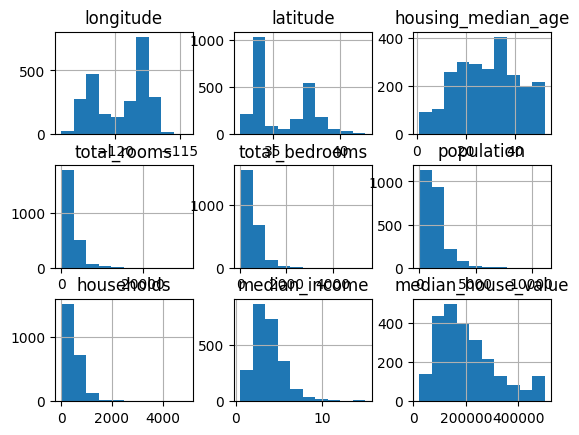

In [90]:
plt.figure(figsize = (20, 8))
train_data.hist()

<Axes: >

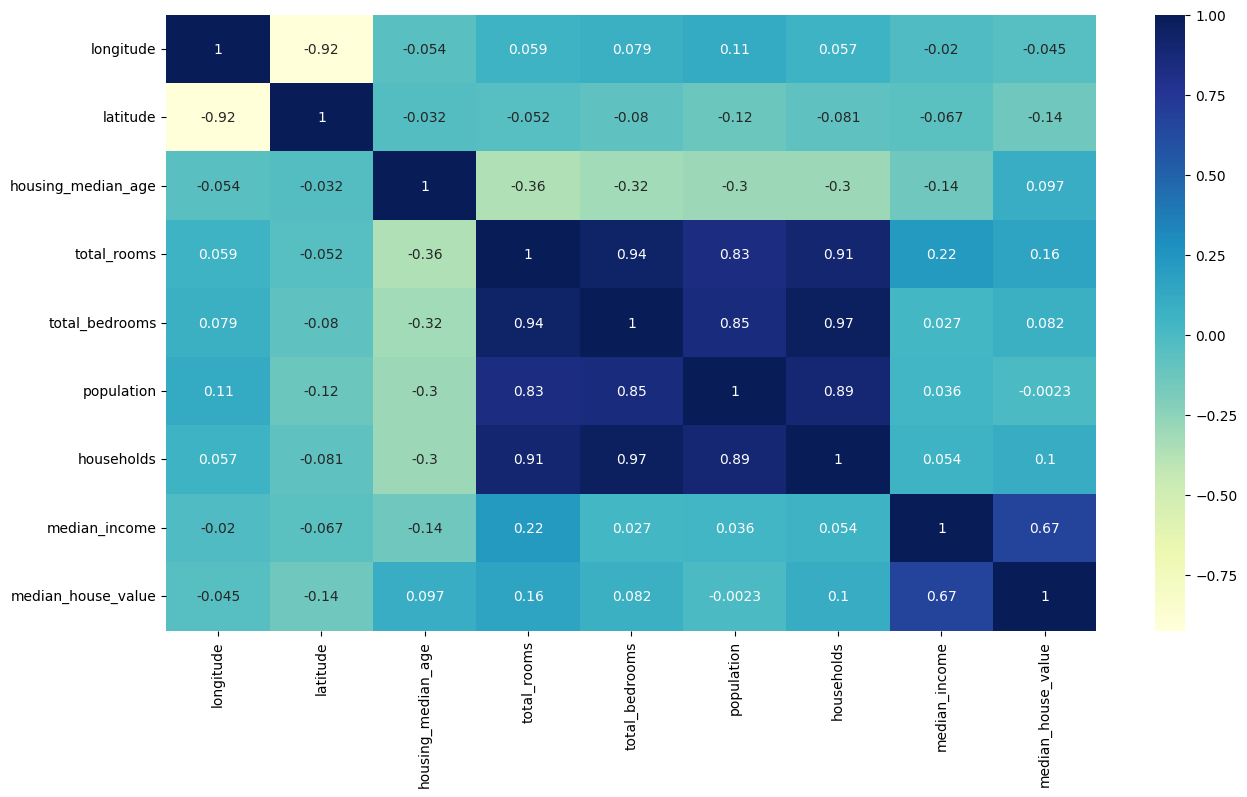

In [91]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [92]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

<Figure size 1500x800 with 0 Axes>

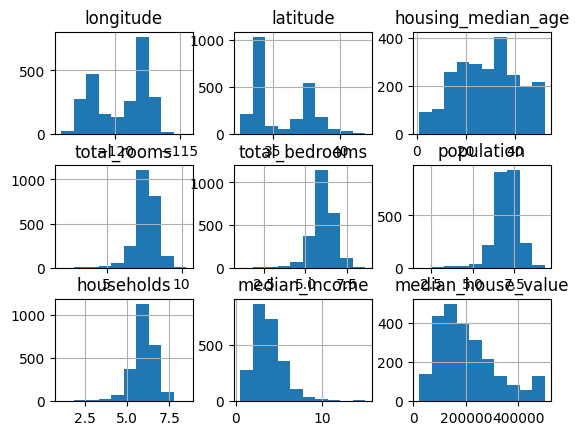

In [93]:
plt.figure(figsize = (15, 8))
train_data.hist()

<Axes: xlabel='latitude', ylabel='longitude'>

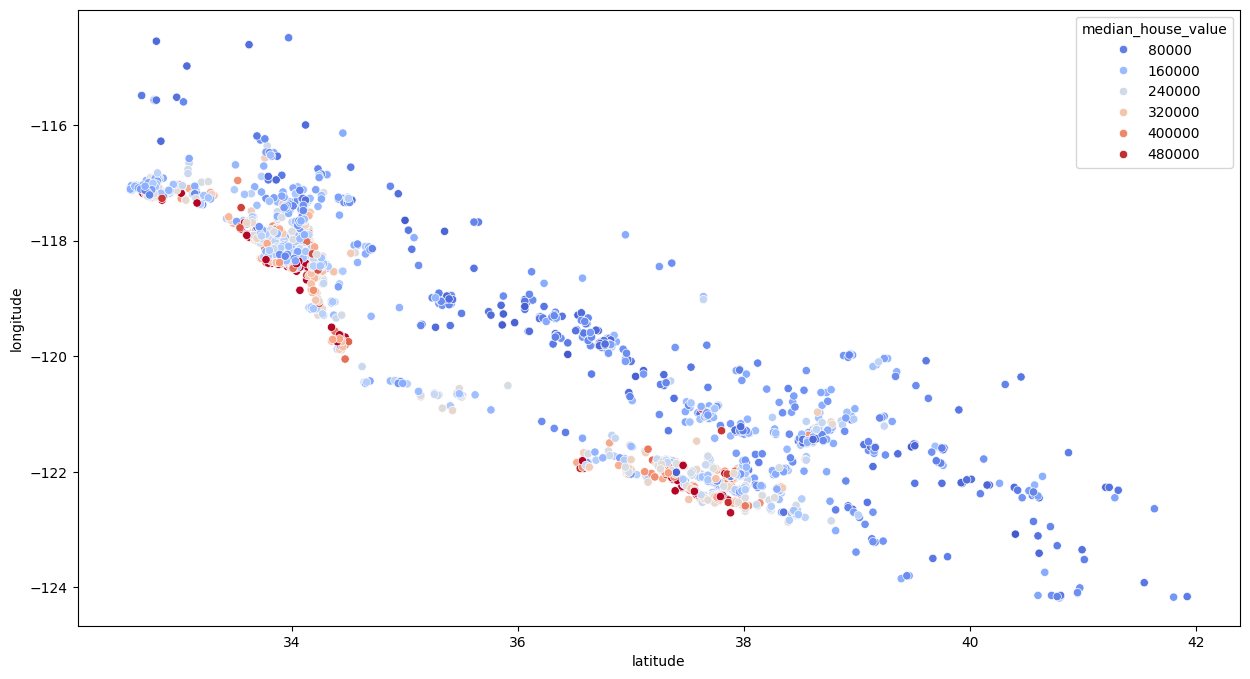

In [94]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = 'coolwarm')

In [95]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

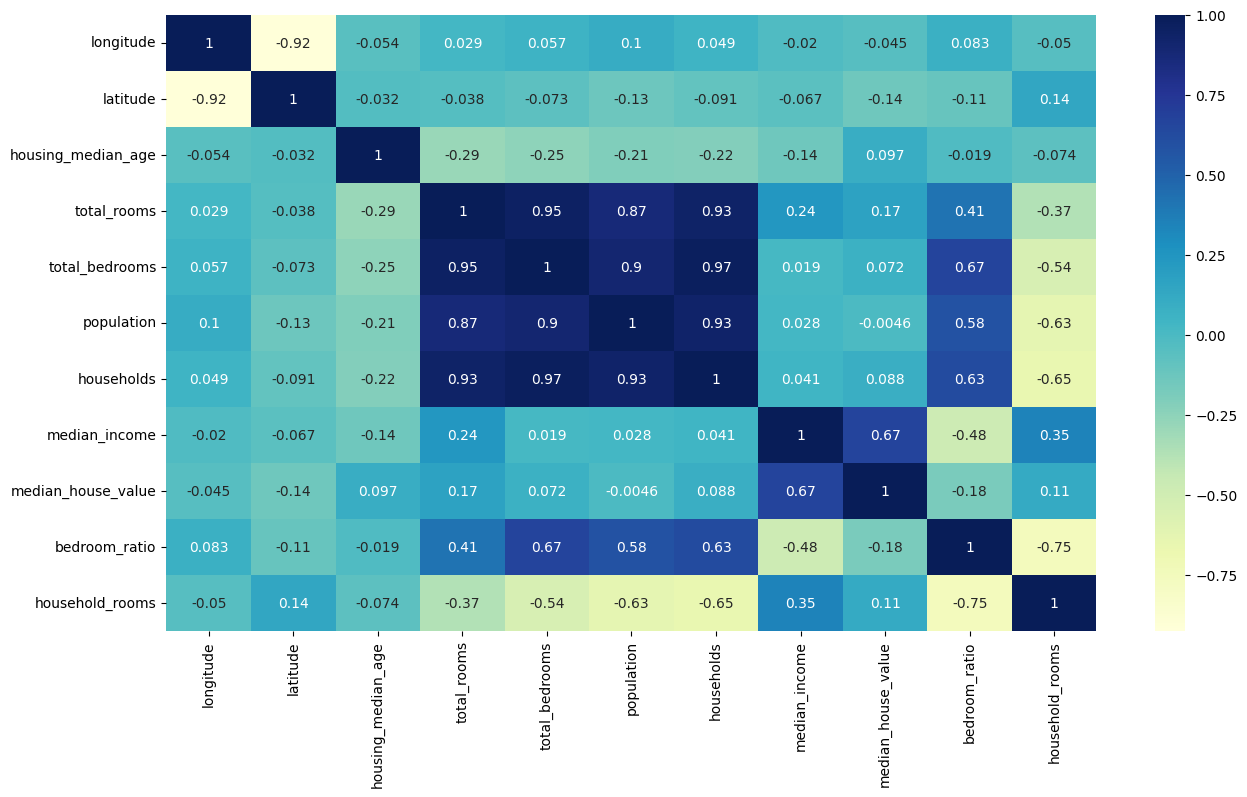

In [96]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [98]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop('median_house_value', axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
test_data = x_train.join(y_train)

test_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
test_data['population'] = np.log(train_data['population'] + 1)
test_data['households'] = np.log(train_data['households'] + 1)

test_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
test_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [ ]:
X_test, y_test = test_data.drop('median_house_value', axis = 1), test_data['median_house_value']

In [108]:
reg.score(X_test, y_test)

0.6541509233649769